# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

  

  
  
  
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy.stats as ss
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
import seaborn as sns

df = pd.read_csv('data/cars_hw.csv')

In [ ]:
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [ ]:
# turning No_of_Owners into numeric

var = 'No_of_Owners'
df.loc[df[var] == "1st", var] = 1
df.loc[df[var] == "2nd", var] = 2
df.loc[df[var] == "3rd", var] = 3

df[var] = pd.to_numeric(df[var])

(array([ 47.,  78.,  96., 115., 107.,  83.,  87.,  73.,  61.,  47.,  53.,
         39.,  31.,  32.,  27.]),
 array([ 1117.        ,  7675.53333333, 14234.06666667, 20792.6       ,
        27351.13333333, 33909.66666667, 40468.2       , 47026.73333333,
        53585.26666667, 60143.8       , 66702.33333333, 73260.86666667,
        79819.4       , 86377.93333333, 92936.46666667, 99495.        ]),
 <BarContainer object of 15 artists>)

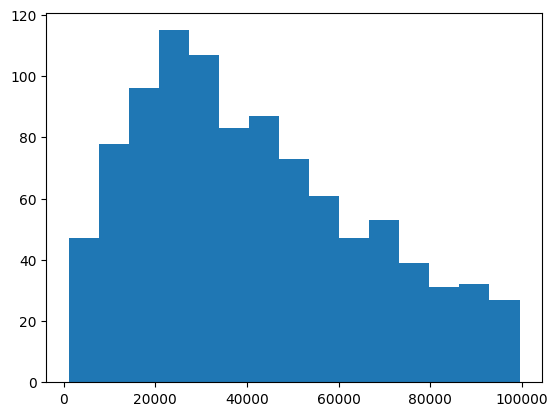

In [ ]:
lt.hist(df['Mileage_Run'], bins='auto')

(array([  4.,   7.,  35.,  35.,  50.,  75.,  74., 108.,  89.,  89., 102.,
         78.,  69.,  66.,  43.,  52.]),
 array([ 33.42154993,  51.04697058,  68.67239123,  86.29781187,
        103.92323252, 121.54865317, 139.17407381, 156.79949446,
        174.42491511, 192.05033575, 209.6757564 , 227.30117705,
        244.92659769, 262.55201834, 280.17743899, 297.80285963,
        315.42828028]),
 <BarContainer object of 16 artists>)

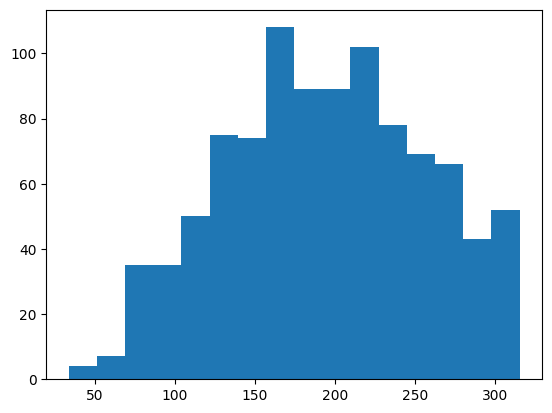

In [ ]:
# Mileage_Run transformation

df['sqrt_Mileage_Run'] = np.sqrt(df['Mileage_Run'])
plt.hist(df['sqrt_Mileage_Run'], bins='auto')


(array([  9.,  65., 103., 106., 106., 105., 102.,  94.,  73.,  40.,  46.,
         33.,  15.,  11.,   6.,   8.,   4.,   4.,  10.,   6.,  10.,   5.,
         13.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 188000.        ,  268970.58823529,  349941.17647059,
         430911.76470588,  511882.35294118,  592852.94117647,
         673823.52941176,  754794.11764706,  835764.70588235,
         916735.29411765,  997705.88235294, 1078676.47058824,
        1159647.05882353, 1240617.64705882, 1321588.23529412,
        1402558.82352941, 1483529.41176471, 1564500.        ,
        1645470.58823529, 1726441.17647059, 1807411.76470588,
        1888382.35294118, 1969352.94117647, 2050323.52941176,
        2131294.11764706, 2212264.70588235, 2293235.29411765,
        2374205.88235294, 2455176.47058824, 2536147.05882353,
        2617117.64705882, 2698088.23529412, 2779058.82352941,
        2860029.41176471, 2941000.        ]),
 <BarContainer object of 34 artist

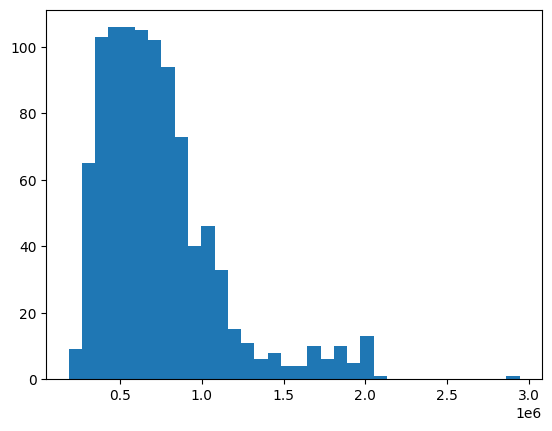

In [ ]:
plt.hist(df['Price'],bins='auto')

(array([  1.,   1.,   8.,  15.,  41.,  40.,  74.,  83.,  78.,  83., 106.,
        106., 100.,  70.,  69.,  24.,  18.,  12.,  21.,  24.,   1.,   0.,
          1.]),
 array([12.83734442, 12.95691238, 13.07648033, 13.19604829, 13.31561624,
        13.4351842 , 13.55475216, 13.67432011, 13.79388807, 13.91345602,
        14.03302398, 14.15259193, 14.27215989, 14.39172784, 14.5112958 ,
        14.63086375, 14.75043171, 14.86999967, 14.98956762, 15.10913558,
        15.22870353, 15.34827149, 15.46783944, 15.5874074 ]),
 <BarContainer object of 23 artists>)

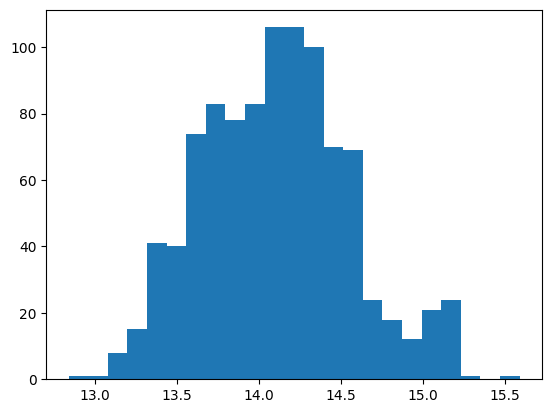

In [ ]:
# Price transformation

df['arcsinh_Price'] = np.arcsinh(df['Price'])
plt.hist(df['arcsinh_Price'], bins='auto')

 2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?

In [ ]:
df['Price'].describe()

count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64

In [ ]:
df['arcsinh_Price'].describe()

count    976.000000
mean      14.104181
std        0.450276
min       12.837344
25%       13.765795
50%       14.102942
75%       14.384228
max       15.587407
Name: arcsinh_Price, dtype: float64

<Axes: ylabel='Density'>

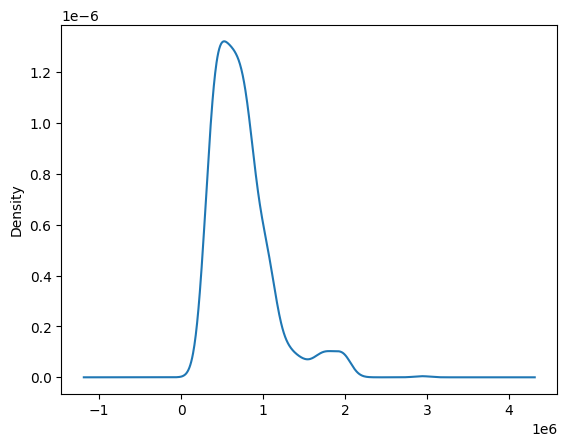

In [ ]:
# KDL with original values

df['Price'].plot.density()

<Axes: ylabel='Density'>

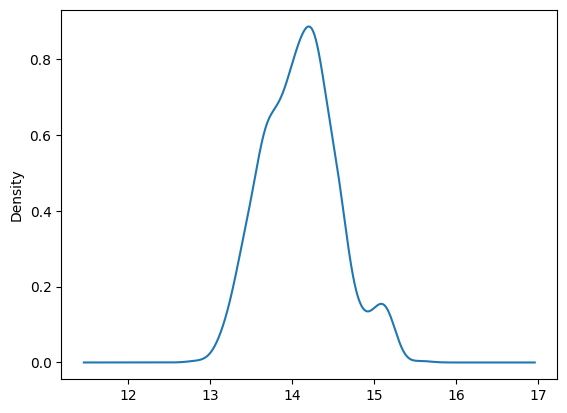

In [ ]:
# KDL with transformed values

df['arcsinh_Price'].plot.density()

In [ ]:
df.loc[:,['Make','Price']].groupby('Make').describe()

Price                                                    \
               count          mean           std        min        25%   
Make                                                                     
Chevrolet        6.0  4.535000e+05  2.466064e+05   267000.0   288500.0   
Datsun           3.0  2.896667e+05  1.050397e+04   279000.0   284500.0   
Ford            52.0  7.211731e+05  1.409277e+05   290000.0   635000.0   
Honda           73.0  7.989726e+05  2.665091e+05   316000.0   581000.0   
Hyundai        305.0  6.918918e+05  2.791597e+05   248000.0   485000.0   
Jeep             4.0  1.499500e+06  1.525134e+05  1290000.0  1447500.0   
Kia              8.0  1.614750e+06  1.190567e+05  1369000.0  1579000.0   
MG Motors       35.0  1.869457e+06  1.216611e+05  1589000.0  1786500.0   
Mahindra        18.0  1.100167e+06  1.755493e+05   796000.0  1037000.0   
Maruti Suzuki  293.0  5.887850e+05  2.160199e+05   237000.0   411000.0   
Nissan           4.0  8.842500e+05  2.895599e+05   475000.0   782500.0   
Renault         68.0  6.625735e+05  2.148273e+05   287000.0   475000.0   
Skoda            5.0  1.136000e+06  1.070175e+06   436000.0   466000.0   
Tata            23.0  1.055217e+06  5.578305e+05   188000.0   779500.0   
Toyota          50.0  8.003400e+05  2.466900e+05   368000.0   526250.0   
Volkswagen      29.0  6.058276e+05  1.198312e+05   402000.0   542000.0   

                                                
                     50%        75%        max  
Make                                            
Chevrolet       345500.0   537500.0   892000.0  
Datsun          290000.0   295000.0   300000.0  
Ford            707500.0   787000.0  1066000.0  
Honda           785000.0   915000.0  1537000.0  
Hyundai         638000.0   837000.0  1742000.0  
Jeep           1529500.0  1581500.0  1649000.0  
Kia            1628500.0  1705750.0  1741000.0  
MG Motors      1848000.0  1978000.0  2019000.0  
Mahindra       1094500.0  1157000.0  1465000.0  
Maruti Suzuki   527000.0   764000.0  1163000.0  
Nissan          978000.0  1079750.0  1106000.0  
Renault         644000.0   801000.0  1164000.0  
Skoda           538000.0  1299000.0  2941000.0  
Tata            869000.0  1552000.0  2100000.0  
Toyota          894000.0  1023000.0  1092000.0  
Volkswagen      607000.0   699000.0   790000.0

<Axes: ylabel='Density'>

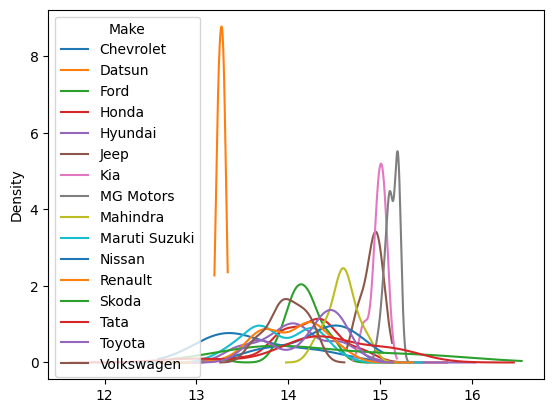

In [ ]:
group_by = 'Make'
var = 'arcsinh_Price'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()

The car brands that are the most expensive will have the highest density values. Based on the grouped kernel density plot, Kia and MG Motors are the two most expensive brands. In general, most of the other brands seem to be clustered close together when it comes to pricing, with a few outliers. Most of the brands that I am used to seeing around, such as Nissan and Toyota, have similar values.  

3. Split the data into an 80% training set and a 20% testing set.

In [ ]:
vars = ['Make', 'Age', 'Color', 'Body_Type', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'sqrt_Mileage_Run']
X = df.loc[:,vars]
y = df['arcsinh_Price']
Train_X, Test_X, Train_y, Test_y = train_test_split(X,y,test_size=.2,random_state=10)

 4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?

In [ ]:
def rmse(SSE, n):
    return np.sqrt(SSE*(1/n))

In [ ]:
#1: Price regression for numeric variables

vars = ['sqrt_Mileage_Run','Age','Seating_Capacity','No_of_Owners']

X = Train_X.loc[:,vars]
y = Train_y

reg = LinearRegression().fit(X,y)

X = Test_X.loc[:,vars]
y = Test_y

print(f"The R squared value for the test set is {reg.score(X,y)}")

errors = (y - reg.predict(X))**2
SSE = errors.sum()
print(f"The RMSE for the test set is {rmse(SSE,len(y))}")

The R squared value for the test set is 0.44176121642491395
The RMSE for the test set is 0.32190678105536963


In [ ]:
#2: Price regression on categorical variables

vars = ['Make','Color','Body_Type','Fuel_Type','Transmission','Transmission_Type']
X_pre = df.loc[:,vars]
X = pd.get_dummies(X_pre)
y = df['arcsinh_Price']

Train_X, Test_X, Train_y, Test_y = train_test_split(X,y,test_size=.2,random_state=10)

reg = LinearRegression(fit_intercept=False).fit(Train_X,Train_y)

print(f"The R squared value for the test set is {reg.score(Test_X,Test_y)}")
errors = (Test_y - reg.predict(Test_X))**2
SSE = errors.sum()
print(f"The RMSE for the test set is {rmse(SSE,len(Test_y))}")

The R squared value for the test set is 0.5972301046887607
The RMSE for the test set is 0.2734315494633899


Model 2 is better, indicated by its low RMSE and higher R squared value. A high R squared value means that the model better explains variability within the data, while a lower RMSE means the model fits the data better and has more precise predictions.

In [ ]:
#3: combo

num_vars = ['sqrt_Mileage_Run','Age','Seating_Capacity','No_of_Owners']
cat_vars = ['Make','Color','Body_Type','Fuel_Type','Transmission','Transmission_Type']

X_cat_pre = df.loc[:,cat_vars]
X1 = pd.get_dummies(X_cat_pre)
X2 = df.loc[:,num_vars]
X = pd.concat([X1,X2],axis=1)
y = df['arcsinh_Price']

Train_X, Test_X, Train_y, Test_y = train_test_split(X,y,test_size=.2,random_state=10)

reg = LinearRegression(fit_intercept=False).fit(Train_X,Train_y)

print(f"The R squared value for the test set is {reg.score(Test_X,Test_y)}")
errors = (Test_y - reg.predict(Test_X))**2
SSE = errors.sum()
print(f"The RMSE for the test set is {rmse(SSE,len(Test_y))}")

The R squared value for the test set is 0.808415116011341
The RMSE for the test set is 0.18858221940807343


The combined model performs better than the two previous ones, with the highest R squared and lowest RMSE. I would say that it performs significantly better, as there is a 0.2 difference in R squared value and a 0.9 difference in RMSE, when comparing it to the categorical variable model.


 5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

num_vars = ['sqrt_Mileage_Run', 'Age', 'Seating_Capacity', 'No_of_Owners', 'Unnamed: 0']
cat_vars = ['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Unnamed: 0']

X1 = pd.get_dummies(df[cat_vars])
X2 = df[num_vars]
y = df['arcsinh_Price']

expander = PolynomialFeatures(degree=2, include_bias=False)
X2_expanded = expander.fit_transform(X2)

zdf = pd.DataFrame(data=X2_expanded, columns=expander.get_feature_names_out(X2.columns))

# Merge numerical and categorical features
X = pd.merge(zdf, X1, on='Unnamed: 0')

# Filter columns excluding 'Unnamed: 0'
X = X.loc[:, ~X.columns.str.startswith('Unnamed: 0')]

# Split data into training and testing sets
Train_X, Test_X, Train_y, Test_y = train_test_split(X, y, test_size=0.2, random_state=10)

reg = LinearRegression(fit_intercept=False).fit(Train_X, Train_y)

#R squared
r_squared = reg.score(Test_X, Test_y)
print(f"R squared: {r_squared}")

#RMSE
errors = (Test_y - reg.predict(Test_X)) ** 2
SSE = errors.sum()
RMSE = (SSE / len(Test_y)) ** 0.5
print(f"RMSE: {RMSE}")

predictions = reg.predict(Test_X)
actuals = Test_y


R squared: 0.8302833892154858
RMSE: 0.17749343635394446


In [ ]:
#Degree 3

expander = PolynomialFeatures(degree=degree, include_bias=False)

Z = expander.fit_transform(X2)  # Transform X2 using the polynomial features

names = expander.get_feature_names_out()

zdf = pd.DataFrame(data=Z, columns=names)

# Merge categorical and expanded features
X = pd.merge(zdf, X1, on='Unnamed: 0')

X = X.loc[:, ~X.columns.str.startswith('Unnamed: 0')]

Train_X, Test_X, Train_y, Test_y = train_test_split(X, y, test_size=0.2, random_state=10)

reg = LinearRegression(fit_intercept=False).fit(Train_X, Train_y)

r_squared = reg.score(Test_X, Test_y)
print(f"R squared: {r_squared}")

errors = (Test_y - reg.predict(Test_X)) ** 2
SSE = errors.sum()
RMSE = (SSE / len(Test_y)) ** 0.5
print(f"RMSE: {RMSE}")

R squared: -37637759157.973564
RMSE: 83585.70346851122


The R squared value becomes negative when degree is set to 3, whereas the results were the most predictive when degree was set to 2. Comparing the R squared and RMSE values to the previous model, however, there are only slight differences between the two, with both being around 0.8 and 0.18, respectively.

6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

Text(0.5, 1.0, 'Model Predictions vs Actual Values for Arcsinh Price')

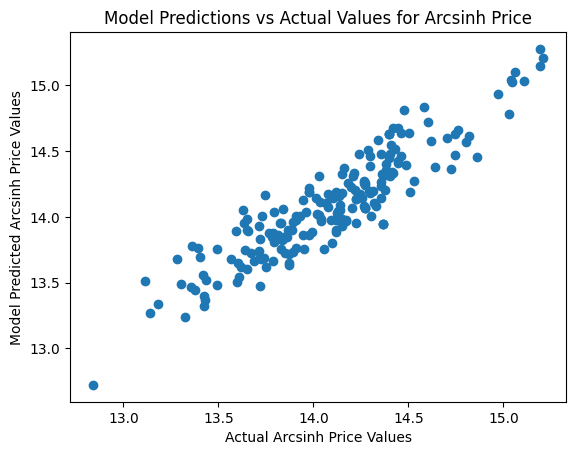

In [ ]:
plt.scatter(actuals,predictions)
plt.xlabel('Actual Arcsinh Price Values')
plt.ylabel('Model Predicted Arcsinh Price Values')
plt.title('Model Predictions vs Actual Values for Arcsinh Price')

The predicted and true values do roughly line up along the diagonal.

Text(0.5, 1.0, 'Distribution of Residuals')

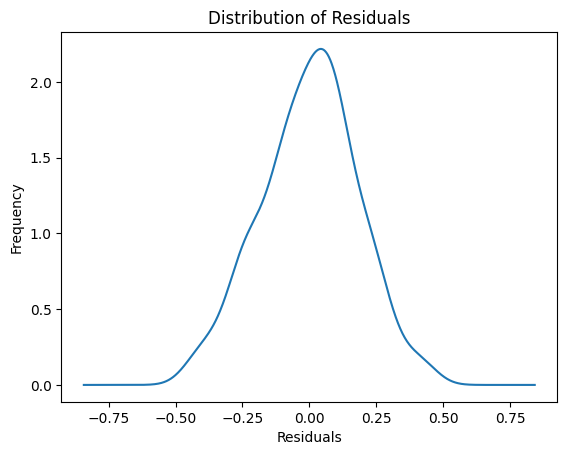

In [ ]:
residuals = actuals - predictions
residuals.plot.density()
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

For the predicted vs. actual price values, there is a visible diagonal, and there is a normal distribution around 0 for the distribution of residuals. A potential weakness of the model is overfitting, which may have occured due to fitting too closely to the training data.

7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?

In [ ]:
# Categorical and numeric variables
cat_vars = ['Make', 'Body_Type', 'Color']
num_vars = ['sqrt_Mileage_Run', 'Age', 'Seating_Capacity', 'No_of_Owners']

X1 = df[cat_vars]
X1 = pd.get_dummies(X1)  # One-hot encode categorical variables
X2 = df[num_vars]

# Combine
X = pd.concat([X1, X2], axis=1)
y = df['arcsinh_Price']

# Training and testing sets
Train_X, Test_X, Train_y, Test_y = train_test_split(X, y, test_size=0.2, random_state=10)

# Defining the range
depths = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
rsqs = []  # List to store R-squared values
rmses = []  # List to store RMSE values

for depth in depths:
    model = tree.DecisionTreeRegressor(max_depth=depth)
    cart = model.fit(Train_X, Train_y)
    y_hat = cart.predict(Test_X)

    SSE = np.sum((Test_y - y_hat) ** 2)
    RMSE = rmse(SSE, len(Test_y))
    rmses.append(RMSE)

    TSS = np.sum((Test_y - Train_y.mean()) ** 2)
    rsq = 1 - SSE / TSS
    rsqs.append(rsq)



In [ ]:
rsqs

[0.6628080232107263,
 0.6895528280060916,
 0.7302133662821308,
 0.7614792250369098,
 0.7538532554912709,
 0.7409106161787362,
 0.7367218606967271,
 0.7267775113180517,
 0.6999276510527053,
 0.705406504489785,
 0.6910544611261925,
 0.7063080067497964,
 0.7114292320772082,
 0.7067446538199706]

In [ ]:
rmses

[0.250342713784628,
 0.2402095079473713,
 0.22392704765041174,
 0.21055203606385456,
 0.21389143182476594,
 0.21944270532100177,
 0.22120948240579616,
 0.22534844262394382,
 0.23616162504254823,
 0.23399572138054814,
 0.23962785698058692,
 0.2336374152646458,
 0.2315914421696439,
 0.23346367024956305]

The best R squared and RMSE are present when depth = 4 (0.7614 and 0.2105).

8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?

Text(0.5, 1.0, 'Tree Predicted Values vs Actual Values')

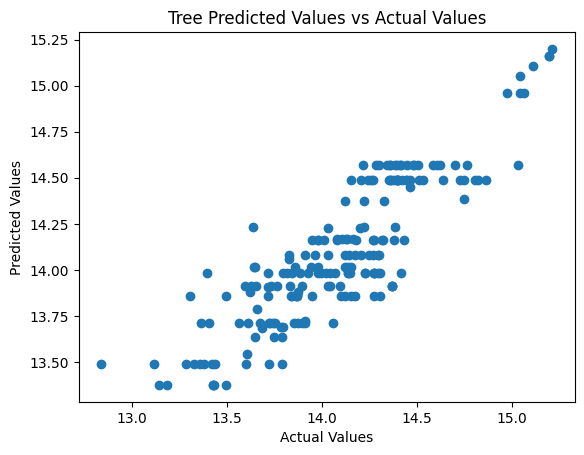

In [ ]:
model = tree.DecisionTreeRegressor(max_depth=6)
cart = model.fit(Train_X, Train_y)
predictions = cart.predict(Test_X)
residuals = Test_y - predictions
plt.scatter(Test_y,predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Tree Predicted Values vs Actual Values')

The predicted values and true values roughly form a diagonal, but it is not a clean line.

Text(0.5, 1.0, 'Distribution of Residuals')

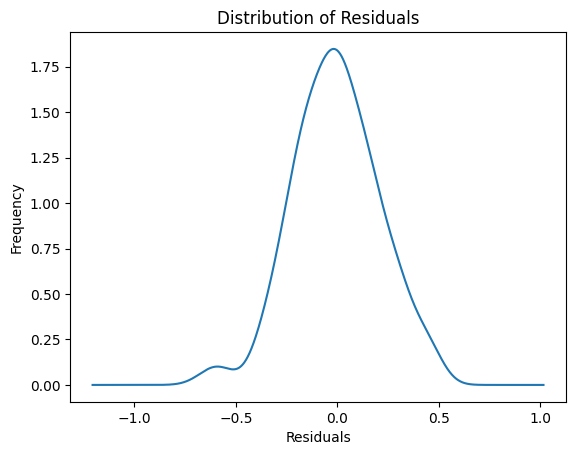

In [ ]:
residuals.plot.density()
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

There is a proper distribution around 0 for the residuals.

9. Which model --- linear model or classification and regression tree --- has better performance on the test set?

The linear model has better performance on the test set.

\**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set?
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4?
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?

4.

$b^*$ will be large when there is a strong relationship between x and y (a change in x will result in a substantial change in y), and will be small when the relationship between x and y is weak. In terms of the amount of noise in x, $b^*$ will be large when variance is lower. $a^*$ represents the intercept in the linear model of y_i = a + b(x_i - x).


5.

If there is a measurement error that increases variance, $b^*$ coefficient will be a smaller value. This is because larger variance will increase the denominator; a larger denominator equals a smaller number. This would affect predictive ability of the model because it becomes more difficult to accurately determine the proper relationship between x and y.

6.

The presence of outliers will have a significant influence on $a^*$ and $b^*$. If there is an outlier in either the outcome or predictor variables, the coefficients will be inaccurate since extreme observations mess with the minimization of SSE. Therefore, the model would be inaccurate as it would try to fit these extreme values rather than determine the overall pattern of data. When a model is trained with signfiicant outliers, there is a possibility that the model fails to generalize to new data that may lack those outliers.